# Minimal DDPM (CIFAR-10) with SGD

In [1]:
# Imports
from pathlib import Path
import torch
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, utils
import matplotlib.pyplot as plt

print('torch:', torch.__version__)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device ->', device)

torch: 2.5.1+cu118
device -> cuda


In [3]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))

In [4]:
# Import implementation
from implementations.base_implementation import (
    DiffusionSchedule, TinyUNet, sample_loop, train_ddim)

torch: 2.5.1+cu118
device -> cuda


d:\EoS\Edge-of-Stability-on-Diffusion\implementations\utils\visualization.py:64: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Hessian Largest Eigenvalue ($\lambda_{max}$) During Training', fontsize=14, fontweight='bold')
d:\EoS\Edge-of-Stability-on-Diffusion\implementations\utils\visualization.py:113: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Hessian Largest Eigenvalue ($\lambda_{max}$) Comparison', fontsize=14, fontweight='bold')


In [5]:
# CIFAR-10 data loaders
def get_dataloaders(batch_size=128, img_size=32, num_workers=4):
    transform = transforms.Compose([
        transforms.Resize(img_size),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),  # map to [-1,1]
    ])
    train_ds = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    test_ds = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=num_workers, pin_memory=True)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False, num_workers=num_workers, pin_memory=True)
    return train_loader, test_loader


In [6]:
# Helper to show saved sample grid
from PIL import Image
def show_image(path, figsize=(6,6)):
    img = Image.open(path)
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.axis('off')
    plt.show()


In [ ]:
# Example: configure and (optionally) run training
# WARNING: Training DDPM on CIFAR-10 is moderately heavy. Reduce epochs or timesteps for quick tests.
timesteps = 200  # use 1000 for standard DDPM; reduce for fast experiments
model = TinyUNet(in_ch=3, base_ch=64)
schedule = DiffusionSchedule(timesteps=timesteps, device=device)
train_loader, test_loader = get_dataloaders(batch_size=128, img_size=32, num_workers=2)

# To run training WITH lambda max computation, uncomment the following line:
lambda_max_history = train_ddim(
    model, schedule, train_loader, device, 
    epochs=10, 
    lr=1e-2, 
    save_dir='./runs_ddim_sgd', 
    ema_decay=0.995,
    compute_lambdamax=True,      # Enable Hessian eigenvalue computation
    lambdamax_freq=500,           # Compute every 500 steps
    num_eigenvalues=1,             # Compute largest eigenvalue
    use_power_iteration=False     # Use LOBPCG (faster)
)

# To run training WITHOUT lambda max (faster):
# train_ddim(model, schedule, train_loader, device, epochs=10, lr=1e-2, save_dir='./runs_ddpm_sgd', ema_decay=0.995)

print('Notebook set up. To begin training, call train_ddim(...) as shown above.')


Files already downloaded and verified
Files already downloaded and verified


Epoch 1/10: 100%|██████████| 391/391 [01:18<00:00,  4.96it/s, loss=0.1808, lr=0.00994]


End epoch 1, avg loss 0.2337
Saved samples to runs_ddpm_sgd\samples_epoch_1.png


Epoch 2/10:  28%|██▊       | 110/391 [00:40<09:53,  2.11s/it, loss=0.1542, lr=0.00974]

Step 500: Lambda Max = 11.312754


Epoch 2/10: 100%|██████████| 391/391 [01:24<00:00,  4.61it/s, loss=0.1595, lr=0.00943]


End epoch 2, avg loss 0.1509
Saved samples to runs_ddpm_sgd\samples_epoch_2.png


Epoch 3/10:  56%|█████▌    | 219/391 [00:53<04:05,  1.43s/it, loss=0.1047, lr=0.00847, λ_max=23.2384]

Step 1000: Lambda Max = 23.238426


Epoch 3/10: 100%|██████████| 391/391 [01:21<00:00,  4.80it/s, loss=0.1047, lr=0.00847, λ_max=23.2384]


End epoch 3, avg loss 0.1350
Saved samples to runs_ddpm_sgd\samples_epoch_3.png


Epoch 4/10:  84%|████████▍ | 328/391 [01:09<00:51,  1.22it/s, loss=0.1579, lr=0.00716]

Step 1500: Lambda Max = 17.515303


Epoch 4/10: 100%|██████████| 391/391 [01:19<00:00,  4.92it/s, loss=0.1579, lr=0.00716]


End epoch 4, avg loss 0.1289
Saved samples to runs_ddpm_sgd\samples_epoch_4.png


Epoch 5/10: 100%|██████████| 391/391 [01:18<00:00,  4.96it/s, loss=0.1293, lr=0.00562]


End epoch 5, avg loss 0.1241
Saved samples to runs_ddpm_sgd\samples_epoch_5.png


Epoch 6/10:  12%|█▏        | 46/391 [00:25<06:32,  1.14s/it, loss=0.1194, lr=0.00482, λ_max=22.9403]

Step 2000: Lambda Max = 22.940315


Epoch 6/10: 100%|██████████| 391/391 [01:21<00:00,  4.78it/s, loss=0.0915, lr=0.00402]               


End epoch 6, avg loss 0.1207
Saved samples to runs_ddpm_sgd\samples_epoch_6.png


Epoch 7/10:  40%|███▉      | 155/391 [00:42<03:13,  1.22it/s, loss=0.1521, lr=0.00325]

Step 2500: Lambda Max = 23.245604


Epoch 7/10: 100%|██████████| 391/391 [01:20<00:00,  4.85it/s, loss=0.1161, lr=0.00252]


End epoch 7, avg loss 0.1207
Saved samples to runs_ddpm_sgd\samples_epoch_7.png


Epoch 8/10:  68%|██████▊   | 264/391 [00:57<01:37,  1.31it/s, loss=0.1155, lr=0.00128, λ_max=31.5896]

Step 3000: Lambda Max = 31.589590


Epoch 8/10: 100%|██████████| 391/391 [01:15<00:00,  5.15it/s, loss=0.1155, lr=0.00128, λ_max=31.5896]


End epoch 8, avg loss 0.1205
Saved samples to runs_ddpm_sgd\samples_epoch_8.png


Epoch 9/10:  95%|█████████▌| 373/391 [01:15<00:13,  1.31it/s, loss=0.1104, lr=0.00041]

Step 3500: Lambda Max = 31.474649


Epoch 9/10: 100%|██████████| 391/391 [01:18<00:00,  5.00it/s, loss=0.1104, lr=0.00041]


End epoch 9, avg loss 0.1195
Saved samples to runs_ddpm_sgd\samples_epoch_9.png


Epoch 10/10: 100%|██████████| 391/391 [00:45<00:00,  8.65it/s, loss=0.1208, lr=0.00002]


End epoch 10, avg loss 0.1202
Saved samples to runs_ddpm_sgd\samples_epoch_10.png
Saved lambda max history to runs_ddpm_sgd\lambda_max_history.csv
Saved lambda max history to runs_ddpm_sgd\lambda_max_history.csv
Notebook set up. To begin training, call train_ddim(...) as shown above.


C:\Users\HP\AppData\Local\Temp\ipykernel_12640\1823789970.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(ckpt_path, map_location=device)


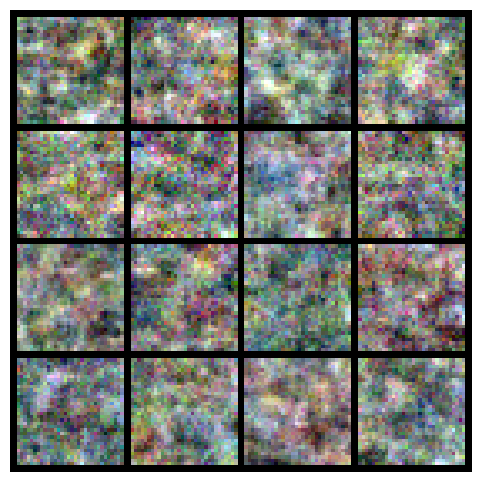

In [8]:
# Load a checkpoint and generate samples (example)
ckpt_path = './runs_ddpm_sgd/checkpoint_epoch_10.pt'  # adjust to your path
if Path(ckpt_path).exists():
    ckpt = torch.load(ckpt_path, map_location=device)
    model.load_state_dict(ckpt['model_state'])
    model.to(device).eval()
    samples = sample_loop(model, schedule, (16,3,32,32), device=device)
    grid = (samples.clamp(-1,1) + 1) / 2.0
    utils.save_image(grid, 'sample_from_ckpt.png', nrow=4)
    show_image('sample_from_ckpt.png')
else:
    print('No checkpoint found at', ckpt_path)


Saved plot to ./runs_ddpm_sgd/lambda_max_plot.png


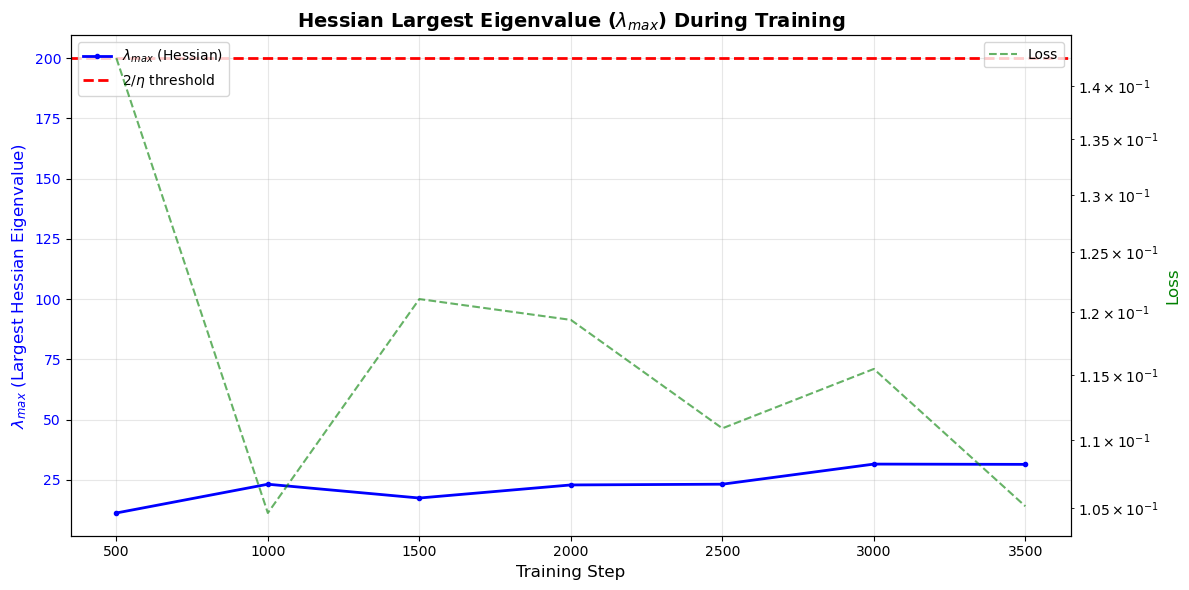

Visualization functions ready. Use plot_lambda_max() to visualize lambda max after training.


In [10]:
# Visualize Lambda Max (Hessian Eigenvalue) - Run this after training with compute_lambdamax=True
from implementations.utils.visualization import plot_lambda_max, save_lambda_max_history, load_lambda_max_history

# If you have lambda_max_history from training:
plot_lambda_max(
    lambda_max_history, 
    save_path='./runs_ddpm_sgd/lambda_max_plot.png',
    learning_rate=1e-2,  # Your learning rate
    show_loss=True
)

# Or load from saved CSV:
# lambda_max_history = load_lambda_max_history('./runs_ddpm_sgd/lambda_max_history.csv')
# plot_lambda_max(lambda_max_history, learning_rate=1e-2, show_loss=True)

print('Visualization functions ready. Use plot_lambda_max() to visualize lambda max after training.')


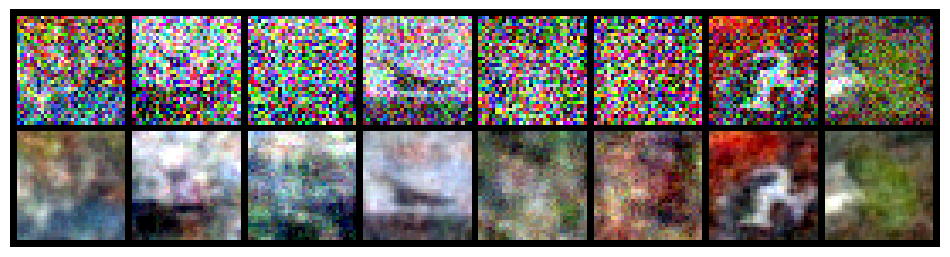

In [11]:
# Short diagnostic: take a test batch, add noise at random t, and visualize noisy vs. denoised (single-step prediction)
loader = test_loader
x, _ = next(iter(loader))
x = x[:8].to(device)
t = torch.randint(0, schedule.timesteps, (x.shape[0],), device=device)
noise = torch.randn_like(x)
x_noisy = schedule.q_sample(x, t, noise=noise)
with torch.no_grad():
    pred_noise = model(x_noisy, t)
    x0_pred = (x_noisy - schedule.sqrt_one_minus_alphas_cumprod[t].view(-1,1,1,1) * pred_noise) / schedule.sqrt_alphas_cumprod[t].view(-1,1,1,1)
    x0_pred = x0_pred.clamp(-1,1)
# show noisy and denoised pairs
pairs = torch.cat([x_noisy[:8], x0_pred[:8]], dim=0)
grid = (pairs + 1)/2.0
utils.save_image(grid, 'diagnostic_pairs.png', nrow=8)
show_image('diagnostic_pairs.png', figsize=(12,4))
